**Opažanja na področju primarne izobrazbe:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

osnovka = pd.read_csv('podatki/os_razredi_spol_vpis_bg.csv', sep=' ', encoding='cp1250')
osnovka = osnovka.loc[osnovka['STAROST'] == 'Starost - SKUPAJ']
osnovka = osnovka.loc[osnovka['VRSTA VPISA'] == 'Vrsta vpisa - SKUPAJ']
osnovka = pd.DataFrame(osnovka)
osnovka = osnovka[osnovka['RAZRED'] != 'Razred - SKUPAJ']
razredi = dict()

for razred in osnovka['RAZRED']:
    if razred not in razredi:
        razredi[razred] = [dict(), dict()]

i = 0
for razred in razredi.keys():
    n_raz = osnovka.loc[osnovka['RAZRED'] == razred]
    n_raz = pd.DataFrame(n_raz)
    tmpm = n_raz.loc[osnovka['SPOL'] == 'Moški']
    tmpm = pd.DataFrame(tmpm)
    tmpz = n_raz.loc[osnovka['SPOL'] == 'Ženske']
    tmpz = pd.DataFrame(tmpz)
    tmpm = tmpm.iloc[: , 4: ]
    tmpz = tmpz.iloc[: , 4: ]
    n_raz = n_raz.iloc[: , 4: ]
    for leto in n_raz.columns:
        razredi[razred][0]['ucenci ' + leto] = int(tmpm[leto]) # moski
        razredi[razred][1]['ucenke ' + leto] = int(tmpz[leto]) # zenske

In [2]:
osnovka = pd.read_csv('podatki/os_razredi_spol_vpis_bg.csv', sep=' ', encoding='cp1250')
osnovka = osnovka.loc[osnovka['STAROST'] == 'Starost - SKUPAJ']
osnovka = osnovka.loc[osnovka['VRSTA VPISA'] == 'ponavljavci']
osnovka = pd.DataFrame(osnovka)
osnovka = osnovka[osnovka['RAZRED'] != 'Razred - SKUPAJ']
razredi_ponavljalci = dict()

for razred in osnovka['RAZRED']:
    if razred not in razredi_ponavljalci:
        razredi_ponavljalci[razred] = [dict(), dict()]

i = 0
labels = []
for razred in razredi.keys():
    n_raz = osnovka.loc[osnovka['RAZRED'] == razred]
    n_raz = pd.DataFrame(n_raz)
    tmpm = n_raz.loc[osnovka['SPOL'] == 'Moški']
    tmpm = pd.DataFrame(tmpm)
    tmpz = n_raz.loc[osnovka['SPOL'] == 'Ženske']
    tmpz = pd.DataFrame(tmpz)
    tmpm = tmpm.iloc[: , 4: ]
    tmpz = tmpz.iloc[: , 4: ]
    n_raz = n_raz.iloc[: , 4: ]
    labels = list(n_raz.columns)
    for leto in n_raz.columns:
        razredi_ponavljalci[razred][0]['ucenci ' + leto] = int(tmpm[leto]) # moski
        razredi_ponavljalci[razred][1]['ucenke ' + leto] = int(tmpz[leto]) # zenske

Razmerja ponavljalcev po spolu


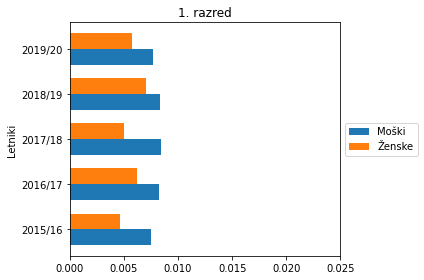

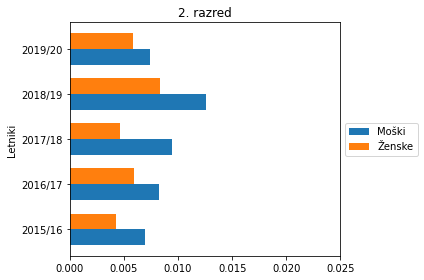

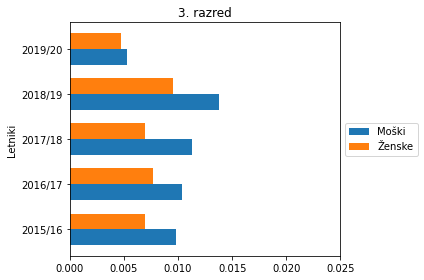

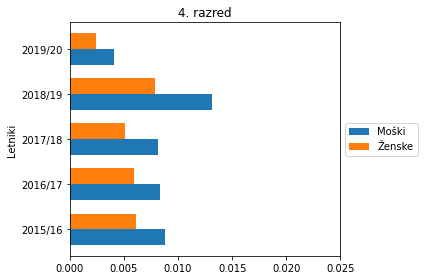

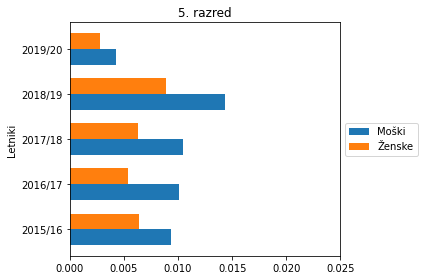

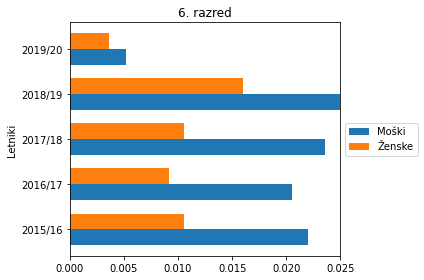

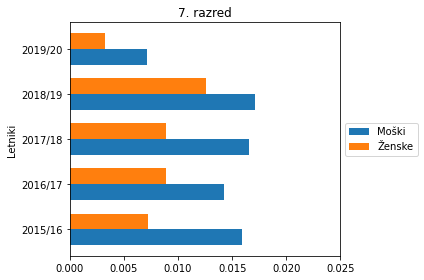

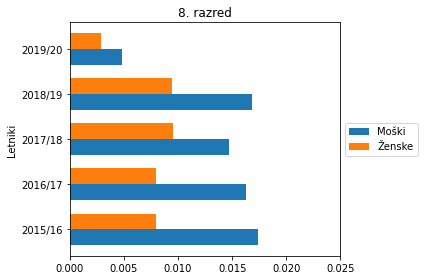

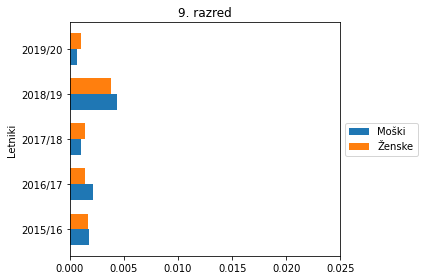

In [10]:
print("Razmerja ponavljalcev po spolu")
x = np.arange(len(labels))
for raz in razredi.keys():
    moski = razredi[raz][0]
    moskip = razredi_ponavljalci[raz][0]
    zenske = razredi[raz][1]
    zenskep = razredi_ponavljalci[raz][1]
    width = 0.35
    moski = [moskip[x]/moski[x] for x in moski]
    zenske = [zenskep[x]/zenske[x] for x in zenske]
    fig, ax = plt.subplots()
    rects1 = ax.barh(x - width/2, moski, width, label='Moški')
    rects2 = ax.barh(x + width/2, zenske, width, label='Ženske')

    ax.set_ylabel('Letniki')
    ax.set_title(raz)
    ax.set_yticks(x, labels)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim(0,0.025)

    #ax.bar_label(rects1, label_type='center')
    #ax.bar_label(rects2, label_type='center')


    fig.tight_layout()

    plt.show()

Na grafih je moč videti, da procenti ponavljalcev razreda za posamičen spol glede na letno raven niso sorazmerne. Kljub temu, da je več učencev kot pa je učenk in normalizaciji podatkov kaže, da so fantje v zaostanku.


**Zaključek primarne izobrazbe:**

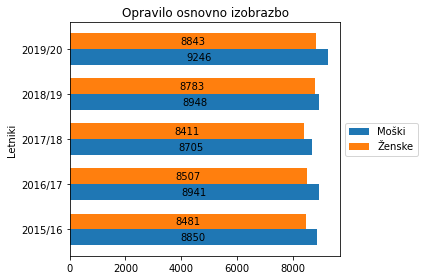

In [4]:

osnovka = pd.read_csv('podatki/os_zakljucili_spol_bg.csv', sep=' ', encoding='cp1250')
ucenci = osnovka.loc[osnovka['SPOL'] ==  'Moški']
ucenke = osnovka.loc[osnovka['SPOL'] ==  'Ženske']
ucenci = pd.DataFrame(ucenci)
ucenke = pd.DataFrame(ucenke)
ucenci = ucenci.drop(['SPOL', 'STAROST'], axis=1)
ucenke = ucenke.drop(['SPOL', 'STAROST'], axis=1)

moski = dict()
zenske = dict()
labels = list(ucenci.columns)

for col in ucenci.columns:
    moski[col] = int(ucenci[col].iloc[0])

for col in ucenke.columns:
    zenske[col] = int(ucenke[col].iloc[0])

moski = list(moski.values())
zenske = list(zenske.values())
width = 0.35

x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, moski, width, label='Moški')
rects2 = ax.barh(x + width/2, zenske, width, label='Ženske')

ax.set_ylabel('Letniki')
ax.set_title("Opravilo osnovno izobrazbo")
ax.set_yticks(x, labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.bar_label(rects1, label_type='center')
ax.bar_label(rects2, label_type='center')


fig.tight_layout()

plt.show()

Več fantov opravi osnovno stopnjo izobrazbe, kot deklet. Če vračunamo biologijo so ti podatki nekoliko zavajujoči.

**Opažanja na področju sekundarne izobrazbe:**

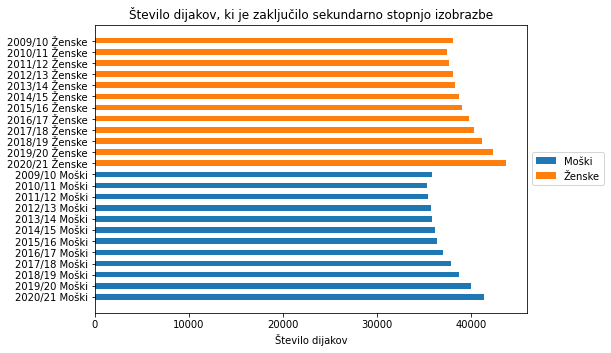

In [5]:
dijaki_vrsta_izobrazbe = pd.read_csv('podatki/dijaki-vrsta-izobrazbe.csv',sep=' ',encoding='cp1250')
podrocja = pd.read_csv('podatki/vrsta_srednje_izobrazbe.csv',sep=' ',encoding='cp1250')
#Dijaki po starosti, letnikih, spolu in vrsti izobraževanja, Slovenija, letno
#Link: https://pxweb.stat.si/SiStatData/pxweb/sl/Data/-/0953221S.px
moski = dict()
zenske = dict()

x1 = list()
x2 = list()
for col in dijaki_vrsta_izobrazbe.columns:
    if("Moški" in col):
        x1.append(col)
        moski[col] = int(dijaki_vrsta_izobrazbe[col].iloc[0])
    if ("Ženske" in col):
        x2.append(col)
        zenske[col] = int(dijaki_vrsta_izobrazbe[col].iloc[0])
x1 = x1[::-1]
x2 = x2[::-1]
x = x1 + x2

moski = list(moski.values())
zenske = list(zenske.values())
ind = np.arange(len(x))


width = 0.50
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
b1 = ax.barh(x2, zenske, width)
b2 = ax.barh(x1, moski, width)

ax.set_title('Število dijakov, ki je zaključilo sekundarno stopnjo izobrazbe')
ax.set_xlabel('Število dijakov')
ax.set_yticks(ind, x)
# ax.bar_label(b1, label_type='center')
# ax.bar_label(b2, label_type='center')

ax.legend(labels=['Moški', 'Ženske'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Iz grafa je razvidno, da več žensk opravi sekundarno stopnjo izobrazbe kot pa moških. Vodenih številk koliko ponavljalcev na letnik ima  kater spol ni. Vsekakor pa gre za vpad v številu moških, ki je zaključilo več kot primarno stopnjo izobrazbe.

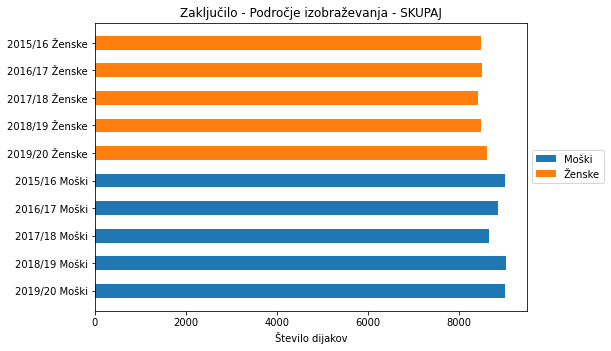

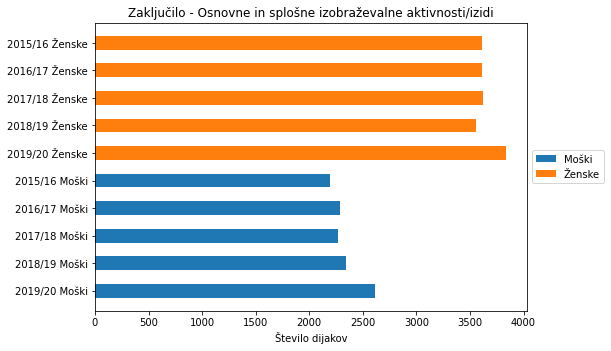

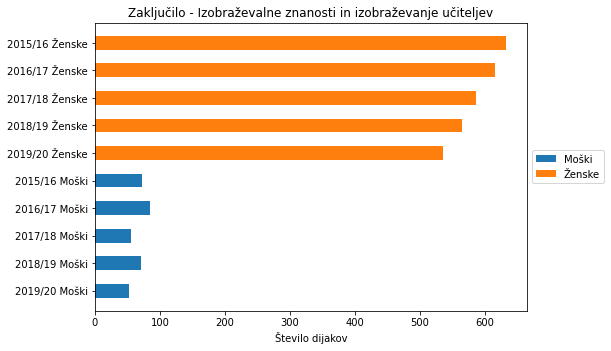

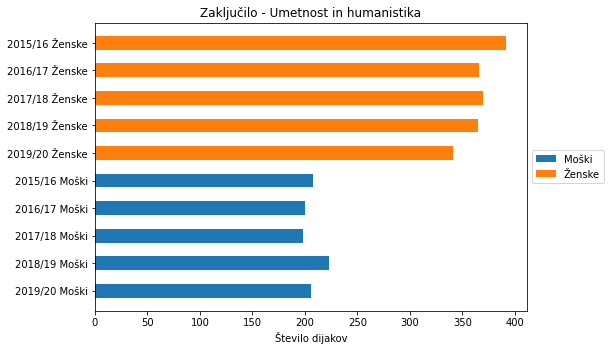

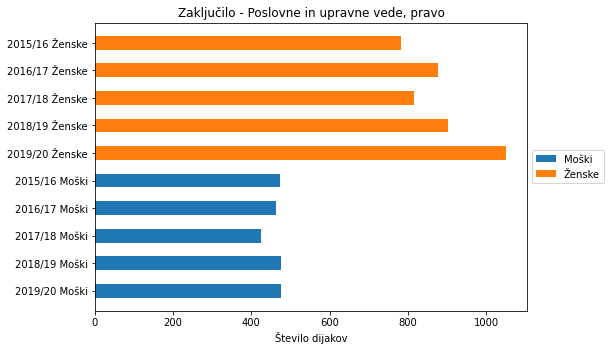

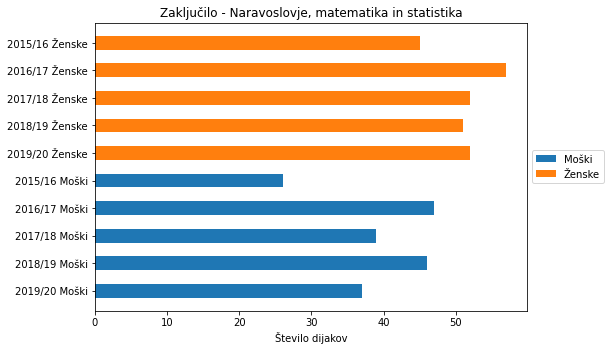

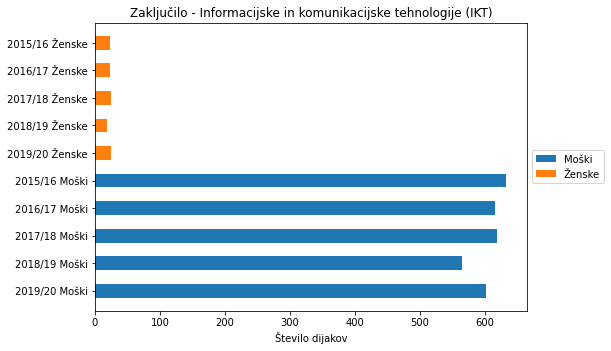

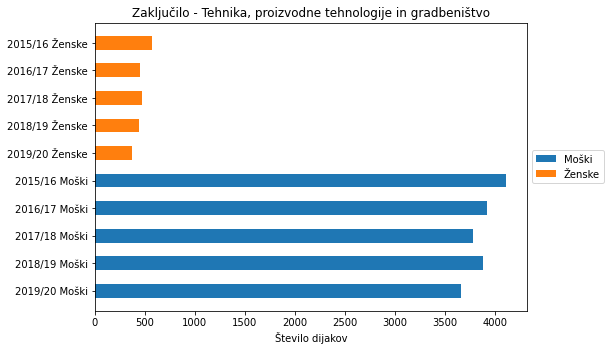

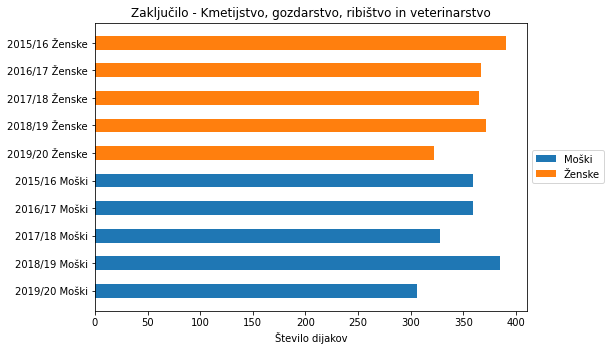

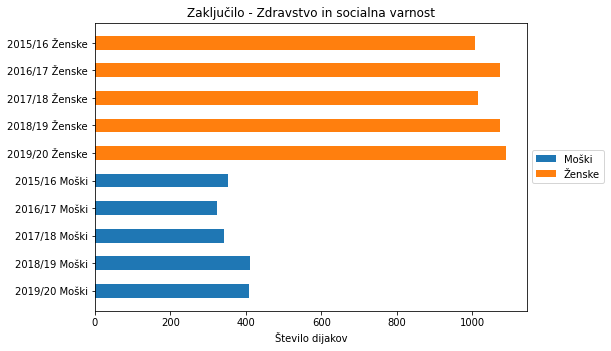

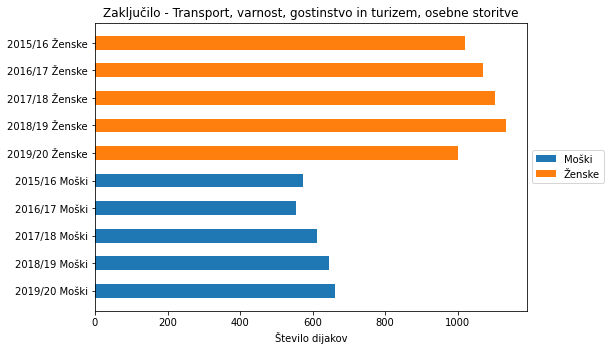

In [6]:
podrocja = pd.read_csv('podatki/podrocje2.csv',sep=',',encoding='cp1250')
#Dijaki po starosti, letnikih, spolu in vrsti izobraževanja, Slovenija, letno
#Link: https://pxweb.stat.si/SiStatData/pxweb/sl/Data/-/0953221S.px
moski = dict()
zenske = dict()
#Skupaj končno število končane srednje izobrazbe
pod = list()
for podrocje in  podrocja['PODROČJE IZOBRAŽEVANJA']:
    pod.append(podrocje)
for i, podrocje in enumerate(pod):
    naslov = "Zaključilo - " + podrocje
    x1 = list()
    x2 = list()
    for col in podrocja.columns:
        if ("Moški" in col):
            x1.append(col)
            moski[col] = int(podrocja[col].iloc[i])

        if ("Ženske" in col):
            x2.append(col)
            zenske[col] = int(podrocja[col].iloc[i])
    x1 = x1[::-1]
    x2 = x2[::-1]
    x = x1 + x2

    moski = list(moski.values())
    zenske = list(zenske.values())
    ind = np.arange(len(x))


    width = 0.50
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    b2 = ax.barh(x1, moski, width)
    b1 = ax.barh(x2, zenske, width)

    ax.set_title(naslov)
    ax.set_xlabel('Število dijakov')
    ax.set_yticks(ind, x)
    # ax.bar_label(b1, label_type='center')
    # ax.bar_label(b2, label_type='center')

    ax.legend(labels=['Moški', 'Ženske'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    moski = dict()
    zenske = dict()

Prvi graf prikazuje število dijakov in dijakinj, ki so zaključili srednjo izobrazbo od leta 2015 do 2020. Nadaljnih 10 grafov pa prikazuje zaključek srednje izobrazbe na določenem področju (vrsta izobrazbe). Iz grafov je razvidna zanimvia porazdelitev interesov. Trditev, da je v akademiki moški spol najbolj prisoten na področjih STEM-a ob se ob pogledu na grafe ne zdi resnična.

**Opažanja na področju terciarne izobrazbe:**